In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_excel('Семинар_4.xlsx', sheet_name = '4' , names = ['num', 'x', 'y']).drop('num', axis = 1)

In [8]:
data['y'] = data['y'].fillna(data['y'].mean())
data = data.dropna(subset=['x'])

In [16]:
# Межквартильное расстояние и границы столбца 'y'
q_025_y = np.quantile(data['y'], 0.25)
q_075_y = np.quantile(data['y'], 0.75)
idq_y = q_075_y - q_025_y
upper_bound_y = q_075_y + 1.5 * idq_y
lower_bound_y = q_025_y - 1.5 * idq_y

print('Первая квартиль (y) =', q_025_y)
print('Третья квартиль (y) =', q_075_y)
print('Межквартильное расстояние (y) =', idq_y)
print('Верхняя граница (y) =', upper_bound_y)
print('Нижняя граница (y) =', lower_bound_y, "\n")

# Замена выбросов в столбце 'y' интерполяцией
for i in data.index:
    if (data.loc[i, 'y'] > upper_bound_y) | (data.loc[i, 'y'] < lower_bound_y):
        print(f"Строка {i}: {data.loc[i, 'y']} изменено на {np.interp(data.loc[i, 'y'], (data['y'].min(), data['y'].max()), (q_025_y, q_075_y))}")
        data.loc[i, 'y'] = np.interp(data.loc[i, 'y'], (data['y'].min(), data['y'].max()), (q_025_y, q_075_y))

Первая квартиль (y) = -2.6852576607765326
Третья квартиль (y) = 2.735390644409723
Межквартильное расстояние (y) = 5.420648305186256
Верхняя граница (y) = 10.866363102189107
Нижняя граница (y) = -10.816230118555916 



<Axes: xlabel='x', ylabel='y'>

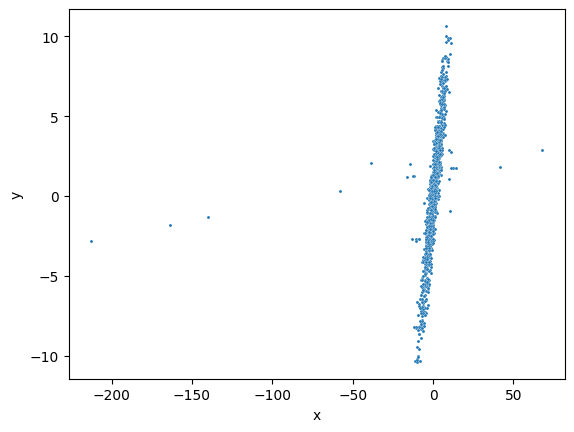

In [12]:
sns.scatterplot(x = data['x'], y = data['y'], s = 5)

  Диаграмма рассеяния с уменьшенным размером маркера


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='x'>

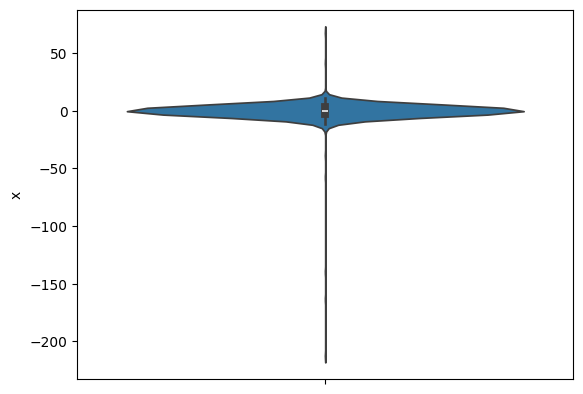

In [13]:
sns.violinplot(y = data['x'], data = data)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='y'>

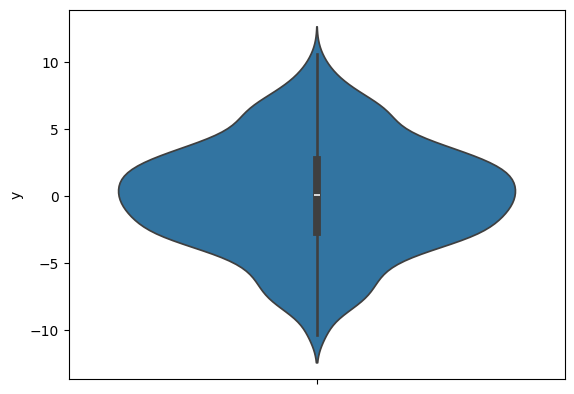

In [14]:
sns.violinplot(y = data['y'], data = data)


Скрипичные диаграммы

<Axes: xlabel='x', ylabel='y'>

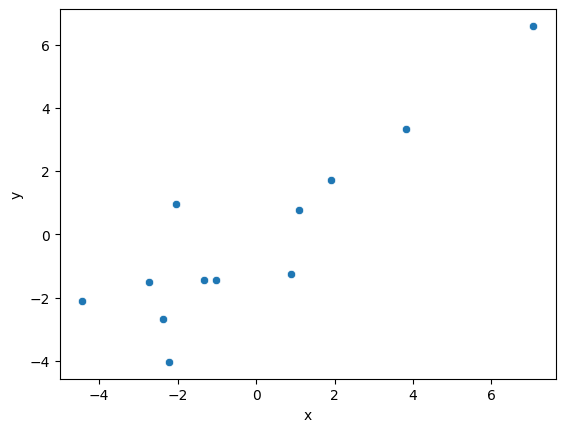

In [15]:
np.random.seed(42)
random_sample = data.sample(12)
sns.scatterplot(x = random_sample['x'], y = random_sample['y'])

Диаграмма рассеяния по случайной выборке из 12 значений